#Types of Normalization- Min-Max scaling,Mean Normalization,Max Absord,Robust scaling

In [38]:
#Min max Scaling: Xi'=xi-xmin / xmax-xmin  (All values Ranges betn 0 and 1) )

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day25-normalization/wine_data.csv")

In [41]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [42]:
df.tail()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [43]:
df.to_csv('Wine_data.csv')

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('Wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [48]:
df

,Class label,Alcohol,Malic acid
0,NaN,1,14.23
1,0.0,1,13.20
2,1.0,1,13.16
3,2.0,1,14.37
4,3.0,1,13.24
...,...,...,...
173,172.0,3,13.71
174,173.0,3,13.40
175,174.0,3,13.27
176,175.0,3,13.17


In [51]:
df1 = pd.DataFrame(df)
# Step 1: Remove rows with NaN values in the 'Class label' column
df1 = df1.dropna(subset=['Class label'])

# Step 2: Rearrange the class labels starting from 0
df1['Class label'] = range(len(df1))

# Reset the index to make it continuous
df1 = df1.reset_index(drop=True)

# Display the modified DataFrame
print(df1)


     Class label  Alcohol  Malic acid
0              0        1       13.20
1              1        1       13.16
2              2        1       14.37
3              3        1       13.24
4              4        1       14.20
..           ...      ...         ...
172          172        3       13.71
173          173        3       13.40
174          174        3       13.27
175          175        3       13.17
176          176        3       14.13

[177 rows x 3 columns]


<Axes: xlabel='Alcohol', ylabel='Density'>

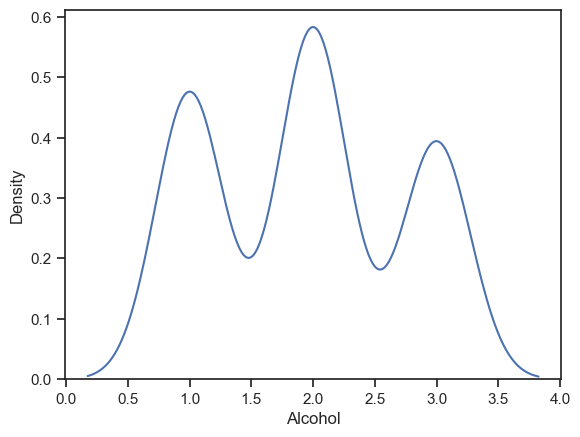

In [52]:
sns.kdeplot(df1['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

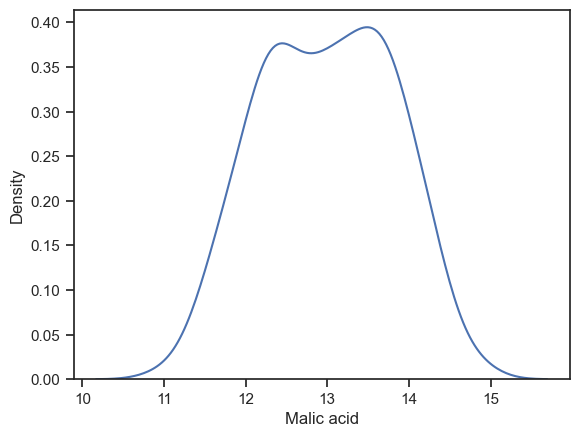

In [53]:
sns.kdeplot(df1['Malic acid'])

C:\Users\Vipul\AppData\Local\Temp\ipykernel_11300\415530929.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Alcohol'], shade=True)


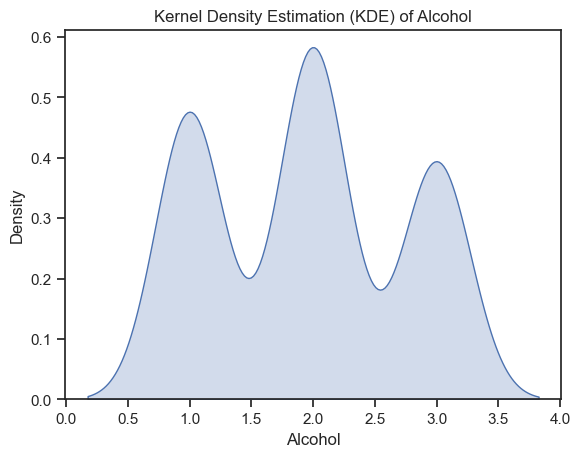

In [54]:
sns.kdeplot(df1['Alcohol'], shade=True)
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) of Alcohol')
plt.show()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_11300\678602459.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1['Malic acid'], shade=True)


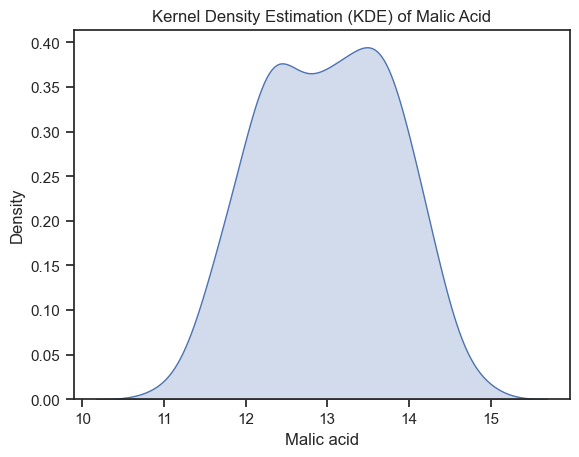

In [55]:
sns.kdeplot(df1['Malic acid'], shade=True)
plt.xlabel('Malic acid')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) of Malic Acid')
plt.show()

In [59]:
df2

,Class label,Alcohol,Malic acid
0,0,1,13.20
1,1,1,13.16
2,2,1,14.37
3,3,1,13.24
4,4,1,14.20
...,...,...,...
172,172,3,13.71
173,173,3,13.40
174,174,3,13.27
175,175,3,13.17


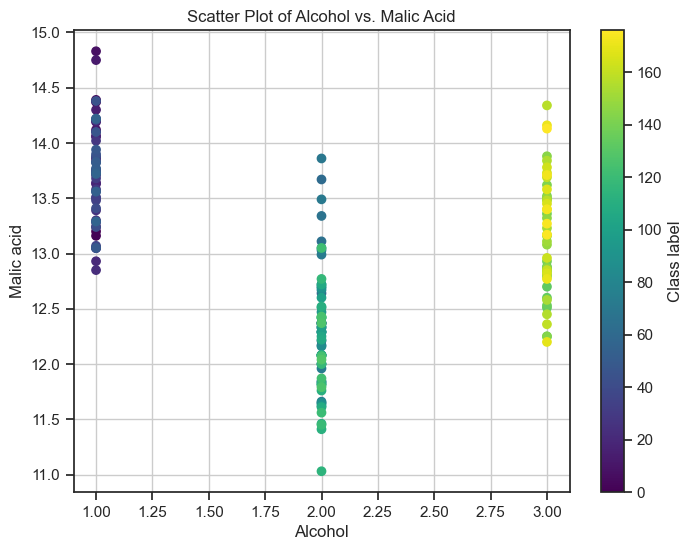

In [62]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df2['Alcohol'], df2['Malic acid'], c=df2['Class label'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.title('Scatter Plot of Alcohol vs. Malic Acid')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Class label', axis=1),
                                                    df2['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((123, 2), (54, 2))

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [66]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,2.0,13.0
std,0.8,0.8
min,1.0,11.0
25%,1.0,12.4
50%,2.0,13.0
75%,3.0,13.6
max,3.0,14.8


In [67]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.5
std,0.4,0.2
min,0.0,0.0
25%,0.0,0.4
50%,0.5,0.5
75%,1.0,0.7
max,1.0,1.0


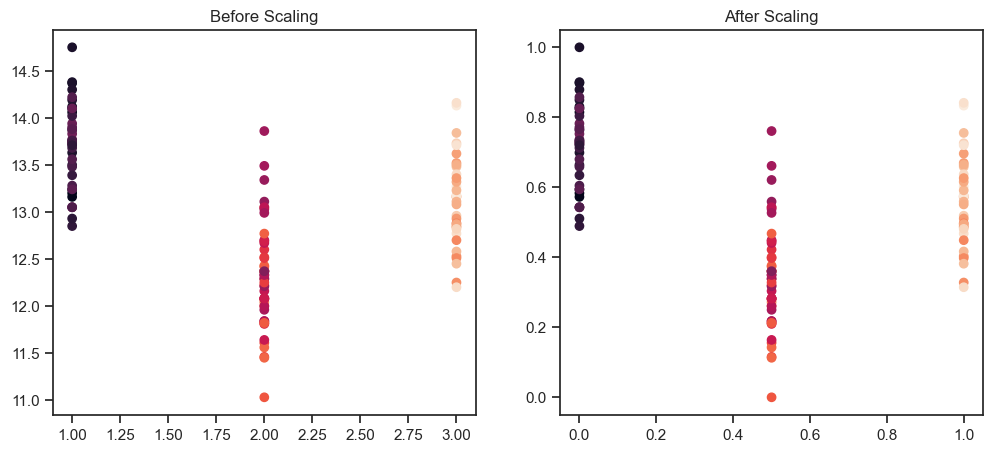

In [68]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

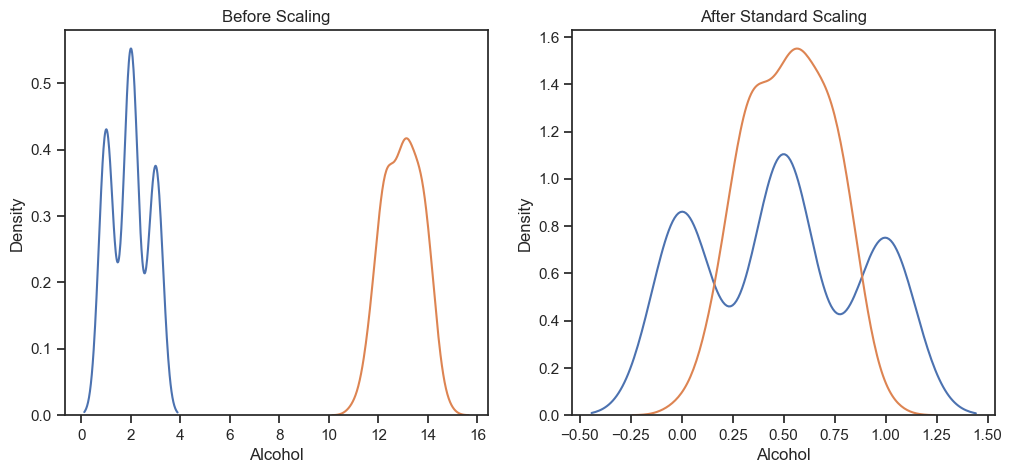

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

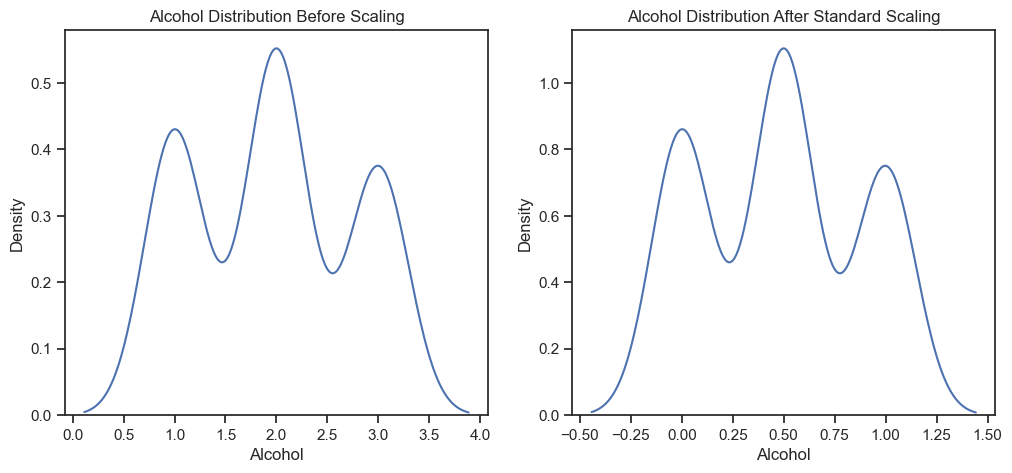

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

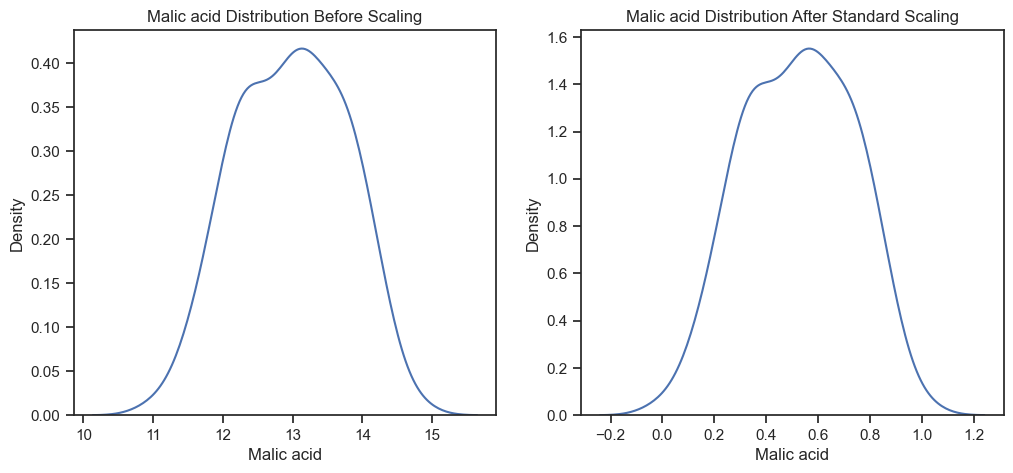

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

In [ ]:
#other normalizations
# mean normalization : xi' = xi - xmean / xmax - xmin
# max-absolute training: xi' = xi / | Xmax | (max abs scaler for sparse data)
# robust scaling: xi' = xi - xmedian / Interquartile range(75th percentile value - 25th percentile value)
# robust_scaler for outliers management
# is feature scaling required?
# most of the probems are solved usingstandardization
# min-max scaler eg image processing 